# Introduction to Unsupervised Learning

In this notebook, we will learn what unsupervised learning is, and some example applications of it on real cleantech datasets. 

Before, we were exposed to supervised learning techniques. This was when we knew the true value/classification of a datapoint. Some examples of supervised learning that we have looked at include logistic regression, linear regression, K-nearest neighbours, decision trees, and random forests.

However, when it comes to unsupervised learning, things are a bit different. 
Unsupervised learning is a machine learning technique where a model learns patterns and structures in data without the need for explicit labels or a predefined target variable. In unsupervised learning, the model explores the inherent structure of the data to identify meaningful patterns, relationships, and groupings. In other words, clustering is huge part of unsupervised learning. 

Unlike supervised learning, where the model is trained on labeled examples to make predictions or classify data, unsupervised learning aims to discover hidden patterns and gain insights from the data itself. It is particularly useful when dealing with unlabeled or unstructured data, as it can help in data exploration, anomaly detection, clustering, and dimensionality reduction.

Here are a few examples of unsupervised learning algorithms:
- K-means clustering 
- DBSCAN
- Heirarchical clustering
- Principal Component Analysis (PCA)


Unsupervised learning techniques play a crucial role in exploratory data analysis, pattern discovery, and understanding complex data structures without prior knowledge. Valuable insights can be gained from unannotated datasets, leading to a better understanding of the underlying data distribution and improved decision-making as a result.

<!-- 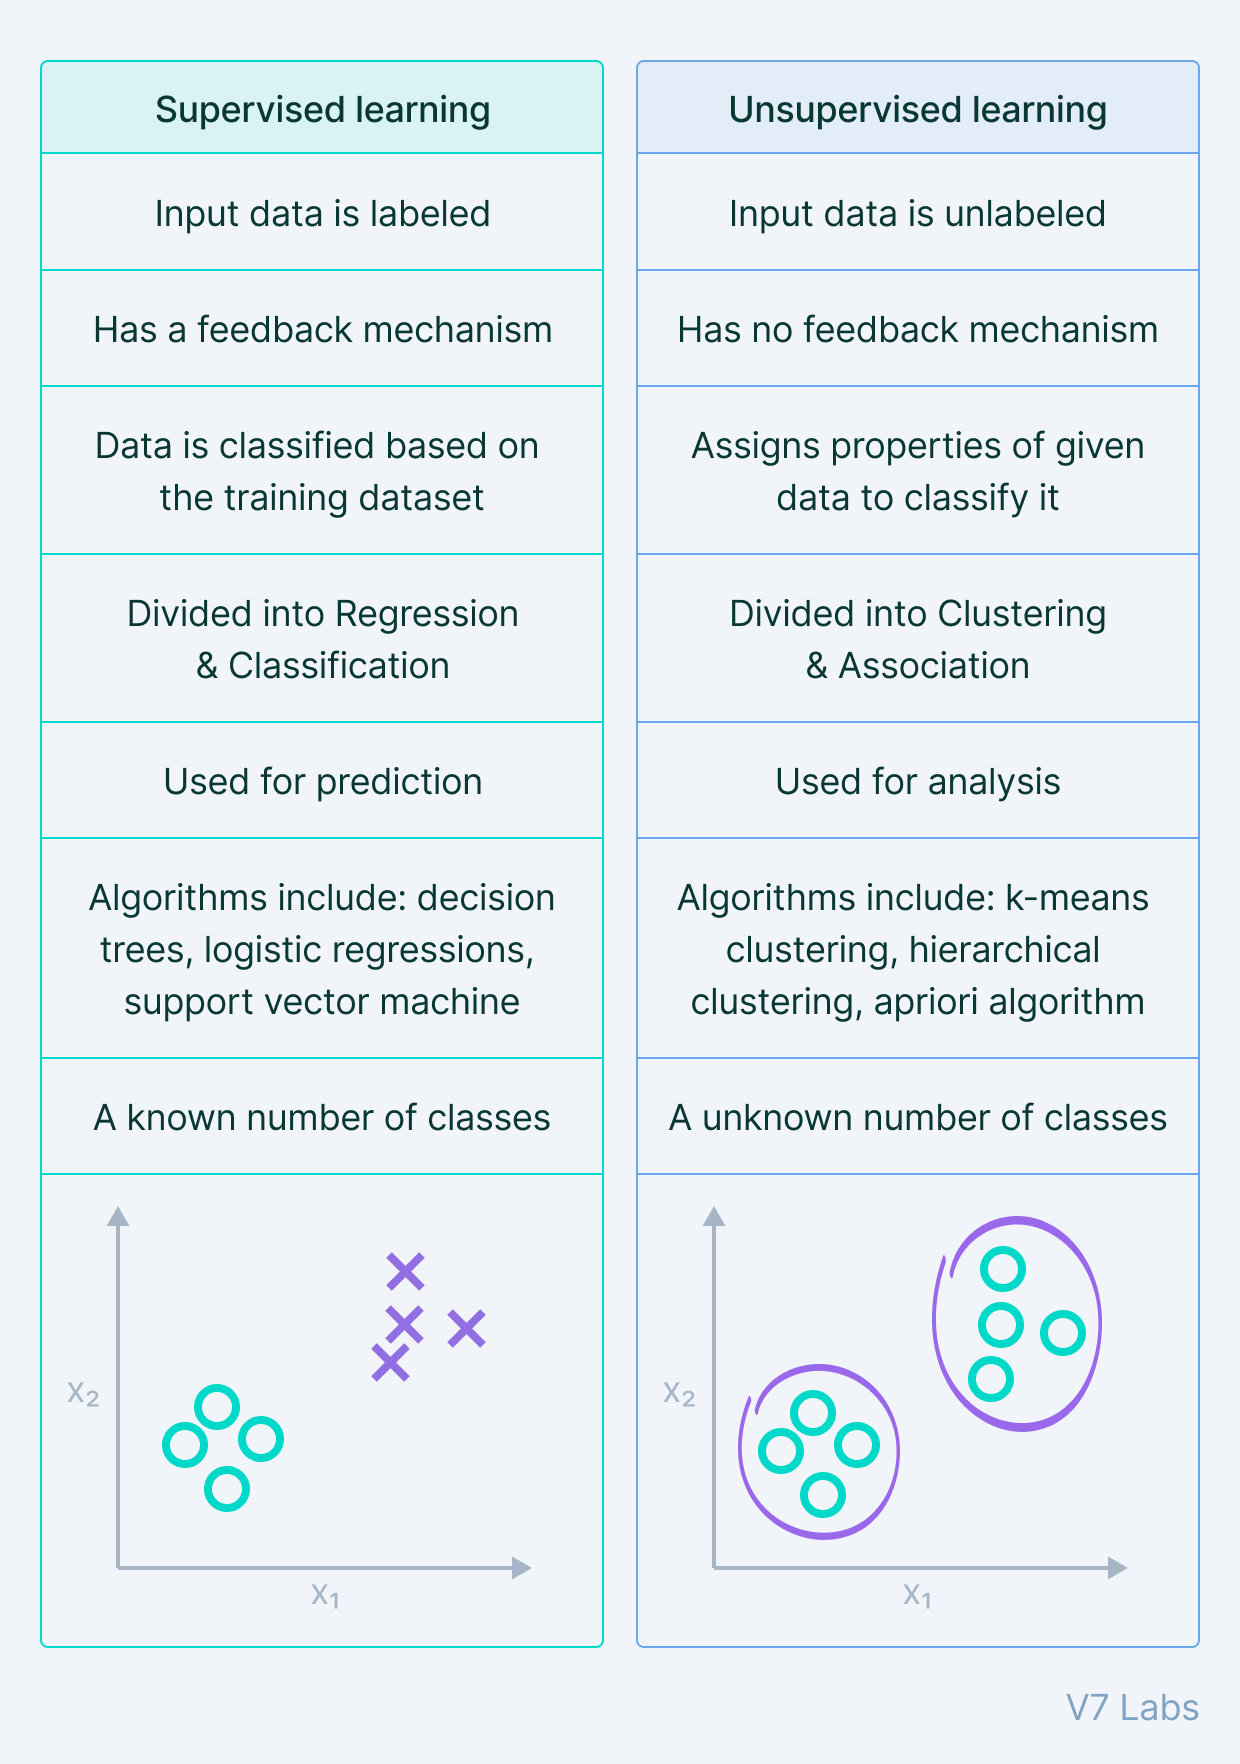 -->
<!-- 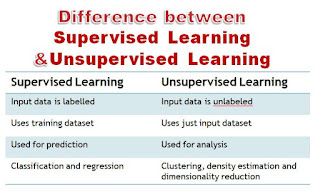 -->

| Supervised Learning | Unsupervised Learning |
| --- | --- | 
| Input data is labelled | Input data is unlabelled |
| Used for prediction | Used for analysis |
| Classification and regression | Clustering, density estimation and dimensionality reduction |

In case of supervised learning, we're given X and y.
In case of unsupervised learning, we're only given X and the goal is to identify the underlying structure in data.


### Supervised Learning:

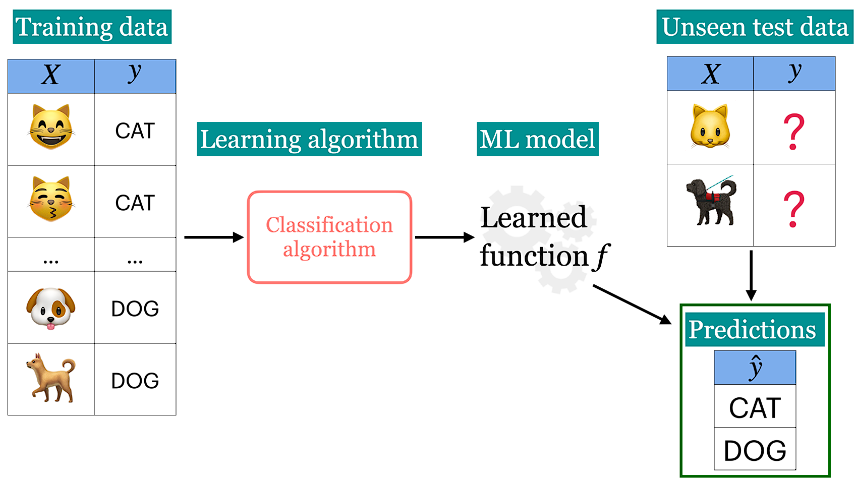

### Unsupervised Learning:

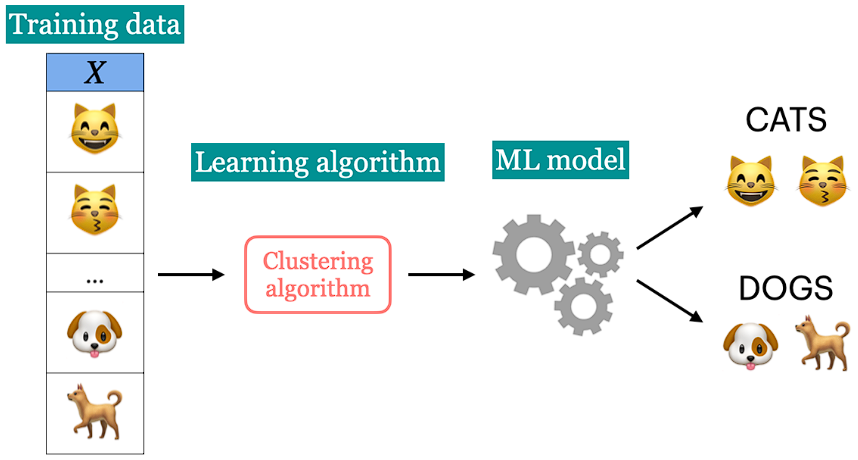

### Example of Supervised vs Unsupervised learning using sklearn's Iris dataset:

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets


iris = datasets.load_iris()  # loading the iris dataset
features = iris.data[:, 2:4]  # only consider two features for visualization (length and width of petals)
labels = iris.target_names[iris.target]  # get the targets, in this case the types of the Iris flower

iris_df = pd.DataFrame(features, columns=iris.feature_names[2:])
iris_df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Let's remind ourselves of the three different types of Iris flower.

In [54]:
np.unique(labels)

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
iris_df["target"] = labels


### Clustering Motivation

What's the importance of clustering, anyway?
- Most of the data out in the wild is actually unlabeled, thus giving us no choice but to execute unsupervised learning techniques.
- Getting labeled training data is often difficult, expensive, or simply impossible in some cases.
- The most intuitive way is to group similar examples together to get some insight into the data even though we do not have the targets.

# Examples of Clustering Methods

### Hierarchical Clustering
Hierarchical clustering builds a tree-like structure of clusters, often represented as a dendrogram. Hierarchical clustering can be either agglomerative (bottom-up) or divisive (top-down). Agglomerative starts with individual data points as clusters and merges them, while divisive starts with all data points in one cluster and splits them. A dendrogram can be used to visually represent both agglomerative and divisive algorithms. 

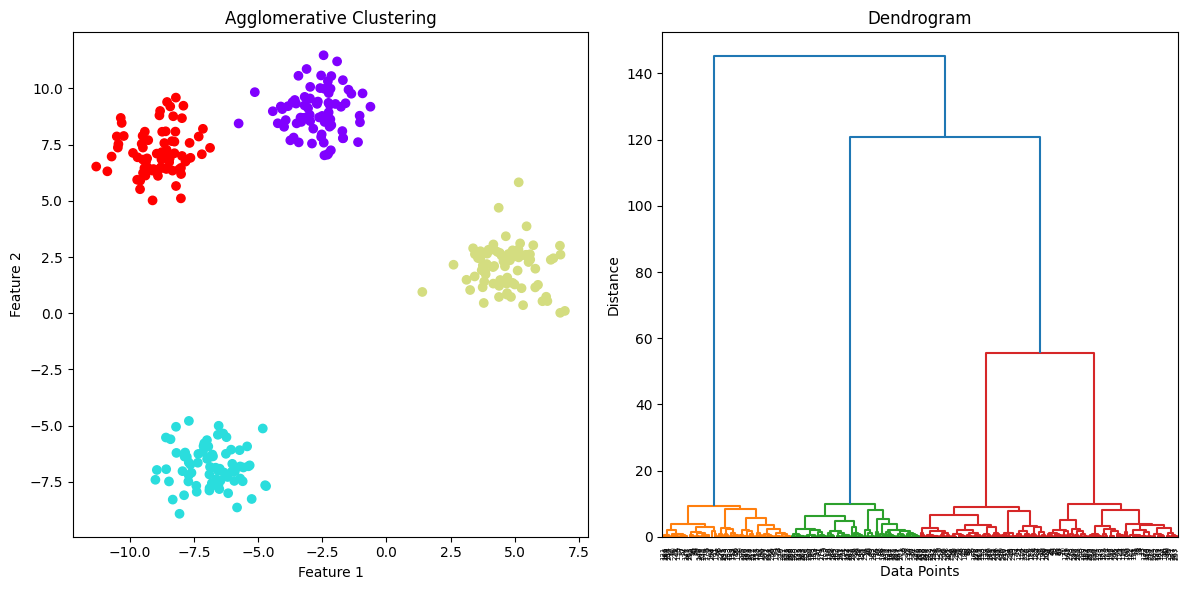

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Generate synthetic data
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_clustering.fit_predict(data)

# Create linkage matrix for the dendrogram
linkage_matrix = linkage(data, method='ward')

# Visualize the results
plt.figure(figsize=(12, 6))

# Scatter plot for Agglomerative Clustering
plt.subplot(1, 2, 1)
plt.scatter(data[:, 0], data[:, 1], c=agg_labels, cmap='rainbow')
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Dendrogram plot
plt.subplot(1, 2, 2)
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.tight_layout()
plt.show()


### Density-Based Clustering (DBSCAN)

DBSCAN groups data points into clusters based on their density. It identifies clusters as areas with a high density of data points separated by areas of lower density. It is capable of discovering clusters with arbitrary shapes.

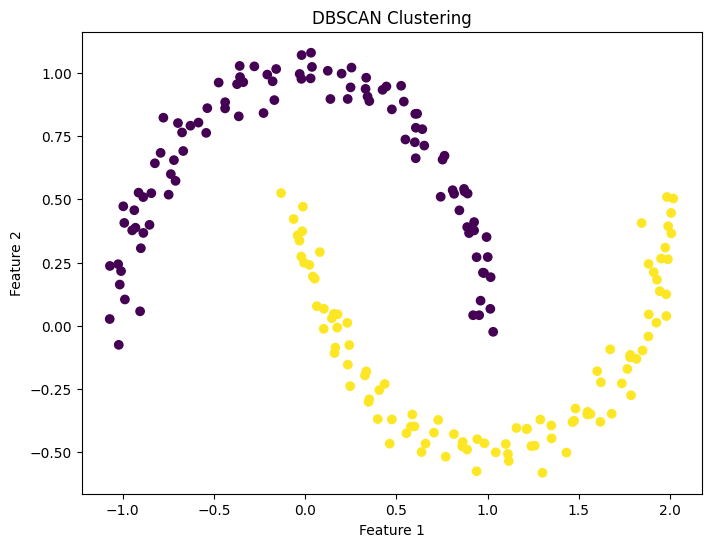

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data (moons dataset)
data, _ = make_moons(n_samples=200, noise=0.05, random_state=0)

# Create and fit the DBSCAN clustering model
dbscan = DBSCAN(eps=0.3, min_samples=5)
cluster_labels = dbscan.fit_predict(data)

# Visualize the clustering results
plt.figure(figsize=(8, 6))

# Plot data points with color-coded clusters
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


### K-Means

In this notebook, we will be exploring the k-means algorithm. The k-means algorithm is a popular unsupervised algorithm used for clustering data. It aims to group similar data points together based on their characteristics. Here's how to perform k-means clustering:

1. Choose the number of clusters (k): First, you need to determine how many groups or clusters you want to create. This value, denoted as "k," is typically specified by the user before running the algorithm.

2. Initialize cluster centers: Randomly select k points from your dataset as the initial cluster centers. These points will act as representatives or centroids for their respective clusters.

3. Assign data points to clusters: For each data point in your dataset, calculate its distance to each cluster center. Assign the data point to the cluster whose centroid is closest to it. This step groups data points into clusters based on proximity.

4. Update cluster centers: After all data points are assigned to clusters, calculate the mean (average) of the data points within each cluster. Update the cluster centers to these new mean values. The cluster centers represent the new centroids for their respective clusters.

5. Repeat steps 3 and 4: Iterate steps 3 and 4 until the cluster assignments no longer change significantly or a maximum number of iterations is reached. In each iteration, data points are reassigned to clusters based on proximity, and cluster centers are updated accordingly.

6. Final result: Once the algorithm converges (i.e., the cluster assignments stabilize), you will have k clusters, with each data point belonging to a specific cluster. These clusters represent groups of data points that are similar to each other based on their features.

The goal of the k-means algorithm is to minimize the sum of distances between data points and their respective cluster centers. By iterating the assignment and update steps, it seeks to find the best clustering solution that optimizes this objective.

It's important to note that the k-means algorithm requires the number of clusters (k) to be predefined. Selecting the appropriate value of k can have an impact on the clustering results, and different initializations of cluster centers may lead to different outcomes. It's also worth considering preprocessing your data and scaling features before applying k-means to ensure fair comparisons.

## Let's try Performing K-means on a Manufacturing Related Dataset!

### What dataset will we be using?
We will be working with a dataset that examines the rank, revenue, and more of various defense manufacturers/contractors. The link to the dataset can be found here: https://www.kaggle.com/datasets/surajjha101/top-defense-manufacturers
<br></br>
A defense contractor is a business organization or individual that provides products or services to a military or intelligence department of a government. Products typically include military or civilian aircraft, ships, vehicles, weaponry, and electronic systems, while services can include logistics, technical support and training, communications support, and engineering support in cooperation with the government.

Security contractors do not generally provide direct support of military operations. Under the 1949 Geneva Conventions, military contractors engaged in direct support of military operations may be legitimate targets of military interrogation.

In the United States, defense contracting has taken an increasingly larger role. In 2009, the Department of Defense spent nearly $316 billion on contracts. Contractors have assumed a much larger on-the-ground presence during American conflicts: during the 1991 Gulf War the ratio of uniformed military to contractors was about 50 to 1, while during the first four years of the Iraq War the U.S. hired over 190,000 contractors, surpassing the total American military presence even during the 2007 Iraq surge and 23 times greater than other allied military personnel numbers. In Afghanistan, the presence of almost 100,000 contractors has resulted in a near 1-to-1 ratio with military personnel.



In [58]:
# Load in the necessary Python libraries. We will be using pandas, numpy and matplotlib (for now). 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [59]:
data = pd.read_csv('../data/top_defense_manufacturers.csv')
data.head() # print out only the first few rows, for easy viewing.

,this_year_rank,last_year_rank,company,leadership,country,2020_defense_revenue,2019_defense_revenue,%_defense_revenue_change,2020_total_revenue,revenue_fom_defense
0,1,1,Lockheed Martin 1 2,"James D. Taiclet, Chairman, President and CEO",U.S.,"$62,562.00","$56,606.00",11%,"$65,398.00",96%
1,2,NEW,Raytheon Technologies 3,"Greg Hayes, CEO and Executive Chairman",U.S.,"$42,000.00",NaN,NaN,"$65,000.00",65%
2,3,2,Boeing 4,"David Calhoun, President and CEO",U.S.,"$32,400.00","$34,300.00",-6%,"$58,158.00",56%
3,4,4,Northrop Grumman,"Kathy J. Warden, Chairman, CEO and President",U.S.,"$31,400.00","$28,600.00",10%,"$36,799.00",85%
4,5,3,General Dynamics 5,"Phebe Novakovic, Chairman and CEO",U.S.,"$29,800.00","$29,512.00",1%,"$37,900.00",79%


Let's take a detailed look at our dataset using the ```info()``` function.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   this_year_rank             100 non-null    int64 
 1   last_year_rank             100 non-null    object
 2   company                    100 non-null    object
 3   leadership                 100 non-null    object
 4   country                    100 non-null    object
 5   2020_defense_revenue       100 non-null    object
 6   2019_defense_revenue       89 non-null     object
 7   %_defense_revenue_change   89 non-null     object
 8   2020_total_revenue         100 non-null    object
 9   revenue_fom_defense        100 non-null    object
dtypes: int64(1), object(9)
memory usage: 7.9+ KB


### What does info() tell us?

We have 10 columns, 1 of which is an int, and 9 object columns. 

This dataset contains a total of 100 rows. 

2 columns, ```2019_defense_revenue``` and ```%_defense_revenue_change```, seem to have missing values.

It's also important to handle these object columns, as they indeed represent numbers, but with the dollar and percentage signs, Python thinks they're strings. 

In [61]:
data

,this_year_rank,last_year_rank,company,leadership,country,2020_defense_revenue,2019_defense_revenue,%_defense_revenue_change,2020_total_revenue,revenue_fom_defense
0,1,1,Lockheed Martin 1 2,"James D. Taiclet, Chairman, President and CEO",U.S.,"$62,562.00","$56,606.00",11%,"$65,398.00",96%
1,2,NEW,Raytheon Technologies 3,"Greg Hayes, CEO and Executive Chairman",U.S.,"$42,000.00",NaN,NaN,"$65,000.00",65%
2,3,2,Boeing 4,"David Calhoun, President and CEO",U.S.,"$32,400.00","$34,300.00",-6%,"$58,158.00",56%
3,4,4,Northrop Grumman,"Kathy J. Warden, Chairman, CEO and President",U.S.,"$31,400.00","$28,600.00",10%,"$36,799.00",85%
4,5,3,General Dynamics 5,"Phebe Novakovic, Chairman and CEO",U.S.,"$29,800.00","$29,512.00",1%,"$37,900.00",79%
...,...,...,...,...,...,...,...,...,...,...
95,96,84,Peraton 27,"Stu Shea, Chairman, President and CEO",U.S.,$651.20,$631.29,3%,"$1,034.06",63%
96,97,NEW,Ukroboronprom,"Yuriy Husyev, Director General",Ukraine,$650.61,$764.98,-15%,"$1,379.95",47%
97,98,82,Cubic Corporation,"Bradley H. Feldmann, Chairman, President and CEO",U.S.,$634.70,$646.70,-2%,"$1,476.00",43%
98,99,NEW,Spirit AeroSystems,"Tom Gentile, President and CEO",U.S.,$613.00,NaN,NaN,"$3,405.00",18%


First off, we can address the white space in the column names. We can do this by using Python's ```str.replace()``` function.

In [62]:
list(data.columns)

['this_year_rank ',
 'last_year_rank ',
 'company ',
 'leadership ',
 'country ',
 '2020_defense_revenue',
 '2019_defense_revenue ',
 '%_defense_revenue_change ',
 '2020_total_revenue ',
 'revenue_fom_defense']

In [63]:
data.columns = data.columns.str.replace(' ', '')

In [64]:
list(data.columns)

['this_year_rank',
 'last_year_rank',
 'company',
 'leadership',
 'country',
 '2020_defense_revenue',
 '2019_defense_revenue',
 '%_defense_revenue_change',
 '2020_total_revenue',
 'revenue_fom_defense']

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   this_year_rank            100 non-null    int64 
 1   last_year_rank            100 non-null    object
 2   company                   100 non-null    object
 3   leadership                100 non-null    object
 4   country                   100 non-null    object
 5   2020_defense_revenue      100 non-null    object
 6   2019_defense_revenue      89 non-null     object
 7   %_defense_revenue_change  89 non-null     object
 8   2020_total_revenue        100 non-null    object
 9   revenue_fom_defense       100 non-null    object
dtypes: int64(1), object(9)
memory usage: 7.9+ KB


Next, we can see that some columns (from 2020_defense_revenue) onward should be numerical variables, but instead they're listed as objects. We can change the datatype using the following sample code (for 1 column only).

In [66]:
data['2020_defense_revenue'] = data['2020_defense_revenue'].str.replace('[\$,]', '', regex=True).astype(float)

Let's implement a for loop and change the datatype for the remaining columns:

In [67]:
columns_to_convert = list(data.columns[6:])

for col in columns_to_convert:
    data[col] = data[col].str.replace('[$,%]', '', regex=True).astype(float)


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   this_year_rank            100 non-null    int64  
 1   last_year_rank            100 non-null    object 
 2   company                   100 non-null    object 
 3   leadership                100 non-null    object 
 4   country                   100 non-null    object 
 5   2020_defense_revenue      100 non-null    float64
 6   2019_defense_revenue      89 non-null     float64
 7   %_defense_revenue_change  89 non-null     float64
 8   2020_total_revenue        100 non-null    float64
 9   revenue_fom_defense       100 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 7.9+ KB


As you can see, the datatype has been changed! But, we still have some missing values in the ```2019_defense_revenue``` and ```%_defense_revenue_change``` columns. 

The next step is to address the missing values. We will be replacing their values with the mean value of all the other data that we do have access to. 

In [69]:
data[['2019_defense_revenue', '%_defense_revenue_change']]

,2019_defense_revenue,%_defense_revenue_change
0,56606.00,11.0
1,NaN,NaN
2,34300.00,-6.0
3,28600.00,10.0
4,29512.00,1.0
...,...,...
95,631.29,3.0
96,764.98,-15.0
97,646.70,-2.0
98,NaN,NaN


In [70]:
columns_to_fill = ['2019_defense_revenue' , '%_defense_revenue_change']

for col in columns_to_fill:
    data[col].fillna(value=data[col].mean() , inplace=True)

In [71]:
data[['2019_defense_revenue', '%_defense_revenue_change']]

,2019_defense_revenue,%_defense_revenue_change
0,56606.000000,11.000000
1,5336.247303,5.719101
2,34300.000000,-6.000000
3,28600.000000,10.000000
4,29512.000000,1.000000
...,...,...
95,631.290000,3.000000
96,764.980000,-15.000000
97,646.700000,-2.000000
98,5336.247303,5.719101


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   this_year_rank            100 non-null    int64  
 1   last_year_rank            100 non-null    object 
 2   company                   100 non-null    object 
 3   leadership                100 non-null    object 
 4   country                   100 non-null    object 
 5   2020_defense_revenue      100 non-null    float64
 6   2019_defense_revenue      100 non-null    float64
 7   %_defense_revenue_change  100 non-null    float64
 8   2020_total_revenue        100 non-null    float64
 9   revenue_fom_defense       100 non-null    float64
dtypes: float64(5), int64(1), object(4)
memory usage: 7.9+ KB


Now, we don't have any missing values, and the datatype of our columns is also correct!

Now, we can proceed to actually implementing our K-means algorithm.

C:\Users\TESTUSER\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


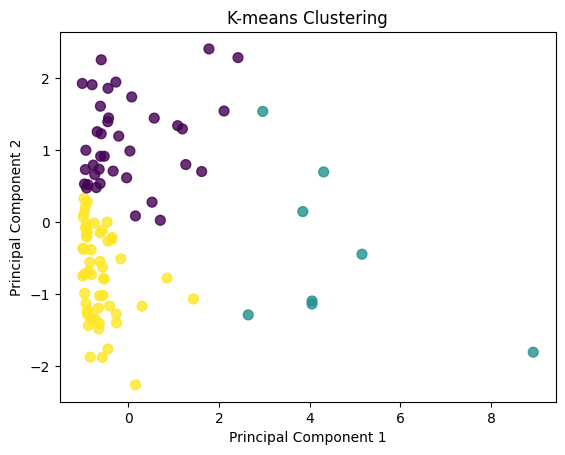

In [73]:
features = data[['2020_defense_revenue', '2019_defense_revenue', '%_defense_revenue_change', '2020_total_revenue', 'revenue_fom_defense']]

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_standardized)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_standardized)
data[['PC1', 'PC2']] = principal_components

plt.scatter(data['PC1'], data['PC2'], c=data['Cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title('K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
